In [1]:
library(caret)
library(dplyr)
options(warn = -1)
library(nnet)
library(e1071)
library(randomForest)
library(party)
# library(NbClust)
library(class)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [2]:
서울대전앞뒤2일 <- read.csv('../Data_Project/alldata.csv', fileEncoding = "utf-8")[,-c(5:9)]
서울대전앞뒤2일[,1] <- as.Date(서울대전앞뒤2일[,1])
head(서울대전앞뒤2일)


날짜,일차,출발시간,소요시간
2013-02-08,0,0,91
2013-02-09,1,0,132
2013-02-10,2,0,83
2013-02-11,3,0,87
2013-02-12,4,0,84
2013-02-08,0,1,88


In [3]:
sum <- 0

for (i in 1:100){
  samp <- createDataPartition(서울대전앞뒤2일$소요시간, p=0.7, list=F)
  data.tr <- 서울대전앞뒤2일[samp,]
  data.test <- 서울대전앞뒤2일[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간

  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.85 < y) & (pred_rf*1.15 > y)) 
  sum <- sum + 예측력_rf
}

sum

[1] 81.9193

In [4]:
## 다 : 66.8
## 1:4 : 68.3

In [5]:
sd22 <- read.csv("../Data_Project/진짜최종.csv", fileEncoding = "UTF-8")

head(sd22)
nrow(sd22)

소요시간,일차,출발시간,연휴길이
91,0,0,3
88,0,1,3
88,0,2,3
87,0,3,3
91,0,4,3
97,0,5,3


[1] 1008

In [6]:
sum <- 0

for (i in 1:100){
  samp <- createDataPartition(sd22$소요시간, p=0.7, list=F)
  data.tr <- sd22[samp,]
  data.test <- sd22[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간

  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.80< y) & (pred_rf*1.2 > y)) 
  sum <- sum + 예측력_rf
}

sum

[1] 83.95333

In [7]:
sdTime <- aggregate(소요시간 ~ 출발시간, sd22, mean)
sdTime

출발시간,소요시간
0,94.14286
1,93.76190
2,94.45238
3,95.54762
4,94.47619
5,95.47619
6,96.69048
7,98.02381
8,97.64286
9,99.69048


In [8]:
table(sd22$일차)


  0   1   2   3   4   5 
192 192 192 192 168  72 

In [9]:
sd222 <- read.csv("../Data_Project/진짜최종_날짜포함.csv", fileEncoding = "utf-8")

In [10]:
head(sd222)

소요시간,일차,출발시간,연휴길이,날짜
91,0,0,2013,2013-02-08
88,1,0,2013,2013-02-08
88,2,0,2013,2013-02-08
87,3,0,2013,2013-02-08
91,4,0,2013,2013-02-08
97,5,0,2013,2013-02-08


In [11]:
popCar <- read.csv("../Data_Project/인구수자동차수.csv", fileEncoding = "utf-8")
popCar

X,년도,서울인구수,승용차,승합차,차합계
1,2013,10388055,2462515,156871,2619386
6,2014,10369593,2510742,149991,2660733
11,2015,10297138,2560154,141927,2702081
16,2016,10204057,2598344,134309,2732653
21,2017,10124579,2641190,127564,2768754
26,2018,10049607,2658637,120780,2779417
31,2019,10010983,2670803,114310,2785113
37,2020,9911088,2711984,106504,2818488


In [12]:
nrow(sd222)

[1] 1056

In [13]:
table(sd222$일차)


 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 

In [14]:
table(sd222$출발시간)


  0   1   2   3   4   5   6 
192 192 192 192 192  72  24 

In [15]:
sd555 <- read.csv("../Data_Project/AI프로젝트22.csv", fileEncoding = 'utf-8')

In [16]:
sd555 <- sd555[,-5]
sd12 <- sd555[,6:8]
head(sd12)
sd12 <- scale(sd12)
head(sd12)

X1종.교통량,X2종.교통량,서울인구수
3793419,229419,10388055
2514790,203047,10388055
1846564,235137,10388055
1632415,305994,10388055
2247045,444384,10388055
5186824,774325,10388055


X1종.교통량,X2종.교통량,서울인구수
-0.7736980,-0.7304996,1.406826
-0.8754301,-0.7805927,1.406826
-0.9285965,-0.7196384,1.406826
-0.9456349,-0.5850469,1.406826
-0.8967328,-0.3221779,1.406826
-0.6628339,0.3045384,1.406826


In [17]:
sdScale <- cbind(sd555[,1:5], sd12)

In [18]:
nrow(sd555)
head(sd555)
head(sdScale)

[1] 1008

소요시간,출발시간,일차,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
91,0,0,3,TRUE,3793419,229419,10388055
88,1,0,3,TRUE,2514790,203047,10388055
88,2,0,3,TRUE,1846564,235137,10388055
87,3,0,3,TRUE,1632415,305994,10388055
91,4,0,3,TRUE,2247045,444384,10388055
97,5,0,3,TRUE,5186824,774325,10388055


소요시간,출발시간,일차,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
91,0,0,3,TRUE,-0.7736980,-0.7304996,1.406826
88,1,0,3,TRUE,-0.8754301,-0.7805927,1.406826
88,2,0,3,TRUE,-0.9285965,-0.7196384,1.406826
87,3,0,3,TRUE,-0.9456349,-0.5850469,1.406826
91,4,0,3,TRUE,-0.8967328,-0.3221779,1.406826
97,5,0,3,TRUE,-0.6628339,0.3045384,1.406826


In [19]:
sum_rf <- 0
# sum_nnet <- 0
sum_ctree <- 0
# sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0

for (i in 1:100){
  samp <- createDataPartition(sdScale$소요시간, p=0.7, list=F)
  data.tr <- sdScale[samp,]
  data.test <- sdScale[-samp,]
    
  # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간)
  y_tr <- data.tr$소요시간
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간)
  y_test <- data.test$소요시간
    
  # RF
  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean((pred_rf*0.85 < y_test) & (pred_rf*1.15 > y_test)) 
  # RF train
  model_rf_tr <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean((pred_rf_tr*0.85 < y_tr) & (pred_rf_tr*1.15 > y_tr))

  
  # 인공신경망
  # model_nnet <- nnet(소요시간 ~ ., data=data.tr, size=3)
  # pred_nnet <- predict(model_nnet, x, type="class")
  # 예측력_nnet <- mean((pred_nnet*0.85 < y) & (pred_nnet*1.15 > y)) 
 
  # 의사결정나무
  model_ctree <- ctree(소요시간 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean((pred_ctree*0.85 < y_test) & (pred_ctree*1.15 > y_test))
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean((pred_ctree_tr*0.85 < y_tr) & (pred_ctree_tr*1.15 > y_tr))
    
  # SVM test
  model_svm <- svm(소요시간 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean((pred_svm*0.85 < y_test) & (pred_svm*1.15 > y_test))
  # SVM train
   model_svm_tr <- svm(소요시간 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean((pred_svm_tr*0.85 < y_tr) & (pred_svm_tr*1.15 > y_tr))
    
  # 다항 로지스틱 회귀분석
  # model_multinom <- multinom(소요시간 ~ ., data=data.tr)
  # pred_multinom <- predict(model_multinom, x, type="class")
  # 예측력_multinom <- mean((pred_multinom*0.85 < y) & (pred_multinom*1.15 > y)) 
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  # sum_multi <- sum_multi + 예측력_multinom
  # sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
}

sum_rf
sum_ctree
sum_svm
# sum_multi
# sum_ctree

sum_rf_tr
sum_ctree_tr
sum_svm_tr

[1] 75.22

[1] 62.80333

[1] 75.38667

[1] 89.95763

[1] 64.70056

[1] 77.49859

In [20]:
nrow(sd555)

[1] 1008

In [21]:
# 정확도
r <- 0

# for (i in 1:100){
samp <- createDataPartition(sdScale$소요시간, p=0.7, list=F)
  data.tr <- sdScale[samp,]
  data.test <- sdScale[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간
    
  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.85 < y) & (pred_rf*1.15 > y)) 
  r <- 1 - sum((y - pred_rf)^2) / sum((y - mean(y))^2)
    
# }   
r

[1] 0.6811472

In [22]:
library(Metrics)


Attaching package: ‘Metrics’

The following objects are masked from ‘package:caret’:

    precision, recall



In [23]:
kmeans(sdScale$출발시간, 3)

K-means clustering with 3 clusters of sizes 336, 336, 336

Cluster means:
  [,1]
1  3.5
2 19.5
3 11.5

Clustering vector:
   [1] 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3
  [38] 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1
  [75] 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3
 [112] 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1
 [149] 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2
 [186] 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1
 [223] 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2
 [260] 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 [297] 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2
 [334] 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3
 [371] 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2

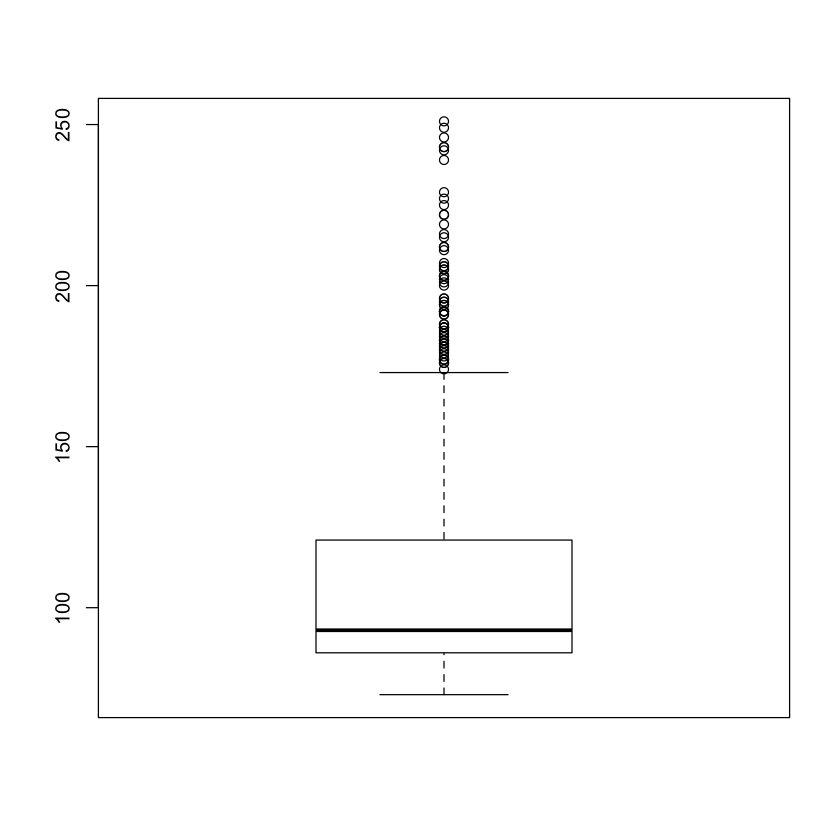

In [24]:
boxplot(sdScale$소요시간)

In [25]:
table(sdScale$일차)


  0   1   2   3   4   5 
192 192 192 192 168  72 

In [26]:
# 일차별 데이터셋 분류
sd1 <- subset(sdScale, 일차 == 0)
sd2 <- subset(sdScale, 일차 == 1)
sd3 <- subset(sdScale, 일차 == 2)
sd4 <- subset(sdScale, 일차 == 3)
sd5 <- subset(sdScale, 일차 == 4)
sd6 <- subset(sdScale, 일차 == 5)

In [27]:
kmeans(sd1$소요시간, 3)

K-means clustering with 3 clusters of sizes 44, 114, 34

Cluster means:
       [,1]
1 129.86364
2  89.23684
3 197.00000

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 1 1 1 1 1 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 3 3 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
[112] 1 1 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 1 3 3 3 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
[186] 1 1 1 3 3 3 3

Within cluster sum of squares by cluster:
[1] 10031.182  5568.605 21062.000
 (between_SS / total_SS =  89.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [28]:
kmeans(sd2$소요시간, 3)

K-means clustering with 3 clusters of sizes 30, 88, 74

Cluster means:
      [,1]
1 200.4333
2 105.4432
3 151.1351

Clustering vector:
  [1] 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1
 [38] 1 1 1 3 3 3 3 2 2 2 2 1 1 1 3 1 3 3 1 3 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 2 3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 3 3 3 3 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 1 1 1 1 3 3 3
[186] 3 3 2 2 2 2 2

Within cluster sum of squares by cluster:
[1] 11557.37 14647.72 11964.65
 (between_SS / total_SS =  85.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [29]:
kmeans(sd3$소요시간, 3)

K-means clustering with 3 clusters of sizes 37, 57, 98

Cluster means:
       [,1]
1 155.94595
2 116.54386
3  90.65306

Clustering vector:
  [1] 3 3 3 3 3 2 3 3 3 3 3 3 3 2 2 2 2 1 1 1 1 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 2 2 2 1 2 1 1 1 1 2 2 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 1 1 1 1 1 1 1 1 1 3 3
 [75] 3 3 3 3 3 3 3 2 3 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2
[112] 1 1 1 1 1 1 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 1 1 1 1 2 2 2 3 3 3 3 3
[149] 3 3 3 2 3 3 2 2 2 2 2 1 2 1 1 1 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 1
[186] 1 1 1 2 2 2 3

Within cluster sum of squares by cluster:
[1] 10125.892  5112.140  4174.204
 (between_SS / total_SS =  85.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [30]:
kmeans(sd4$소요시간, 3)

K-means clustering with 3 clusters of sizes 38, 146, 8

Cluster means:
       [,1]
1 104.63158
2  87.05479
3 168.50000

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 1 1 1 3 3 3 3 3 3 3 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
[186] 1 1 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 3334.842 2967.562 3400.000
 (between_SS / total_SS =  85.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [31]:
kmeans(sd5$소요시간, 3)

K-means clustering with 3 clusters of sizes 79, 10, 79

Cluster means:
       [,1]
1  82.46835
2 124.90000
3  91.46835

Clustering vector:
  [1] 1 1 1 1 1 3 1 1 1 1 1 1 3 3 3 3 3 3 3 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 3 3 3 1 1 1 1 1 1 3 3 3 3 3 3 1 1 3 1 1 1 3
 [75] 3 3 3 3 3 1 1 3 1 3 1 1 3 3 3 3 3 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 3 3 1 1 3 1
[149] 1 1 1 1 1 1 1 1 1 1 3 3 1 3 3 3 3 3 3 3

Within cluster sum of squares by cluster:
[1]  469.6709 1208.9000 1055.6709
 (between_SS / total_SS =  86.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [32]:
kmeans(sd6$소요시간, 3)

K-means clustering with 3 clusters of sizes 13, 34, 25

Cluster means:
      [,1]
1 93.15385
2 85.61765
3 79.20000

Clustering vector:
 [1] 3 3 3 2 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 3 1 1 1 3 3 3 3 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 3 3 3 3 1 3 3 3 3 3 3 3 3 2 1 1 1 1 1 1 1 1 1 2

Within cluster sum of squares by cluster:
[1]  73.69231  94.02941 150.00000
 (between_SS / total_SS =  84.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [33]:
# 출발시간별 데이터셋 분류
sd <- subset(sdScale, 출발시간 == 0)

In [34]:
kmeans(subset(sdScale, 출발시간 == 0)$소요시간, 3)

K-means clustering with 3 clusters of sizes 5, 36, 1

Cluster means:
       [,1]
1 137.00000
2  84.72222
3 219.00000

Clustering vector:
 [1] 2 1 2 2 2 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
[39] 1 2 2 2

Within cluster sum of squares by cluster:
[1] 1090.000 1105.222    0.000
 (between_SS / total_SS =  92.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [35]:
table(sdScale$소요시간)


 73  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93 
  1   4   3   4   8  19  23  29  32  29  42  38  34  48  32  41  31  31  29  38 
 94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 
 26  17  12  14   9  13   8   7  15   8  11   7   6   8   7   3   6   9  10   6 
114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 
  6   4   4   5   9   4   2   7   3   5   6   5   2   7   4   6   1   4   2   9 
134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 
  3   2   2   2   2   7   1   4   4   4   8   4   4   4   5   5   5   1   3   3 
154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 
  3   4   5   3   4   1   5   1   3   2   2   3   3   3   3   1   3   2   2   1 
174 176 177 178 179 180 181 182 183 184 185 186 187 188 191 192 194 195 196 200 
  1   2   3   1   1   2   2   2   3   1   2   1   4   2   2   4   2   2   2   1 
201 202 203 205 206 207 211

In [36]:
library(dplyr)
sdScaleArr <- arrange(sdScale, 소요시간)

In [37]:
nrow(sdScaleArr[sdScaleArr$소요시간 <= 84,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 84 & sdScaleArr$소요시간 <= 89,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 89 & sdScaleArr$소요시간 <= 113,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 114 & sdScaleArr$소요시간 <= 173,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 173,])


[1] 194

[1] 193

[1] 331

[1] 216

[1] 68

In [39]:
sd일차 <- read.csv("../Data_Project/일단최종6월13일.csv")
head(sd일차)
nrow(sd일차)

소요시간,출발시간,일차,연휴길이,날짜,눈비,X1종.교통량,X2종.교통량,서울인구수,디데이
91,0,0,3,2013-02-08,TRUE,3793419,229419,10388055,전전날
88,1,0,3,2013-02-08,TRUE,2514790,203047,10388055,전전날
88,2,0,3,2013-02-08,TRUE,1846564,235137,10388055,전전날
87,3,0,3,2013-02-08,TRUE,1632415,305994,10388055,전전날
91,4,0,3,2013-02-08,TRUE,2247045,444384,10388055,전전날
97,5,0,3,2013-02-08,TRUE,5186824,774325,10388055,전전날


[1] 432

In [40]:
sd일차0 <- subset(sd일차, 일차 == 0)
nrow(sd일차0)
sd일차1 <- subset(sd일차, 일차 == 1)
nrow(sd일차1)
sd일차2 <- subset(sd일차, 일차 == 2)
nrow(sd일차2)

[1] 144

[1] 144

[1] 144

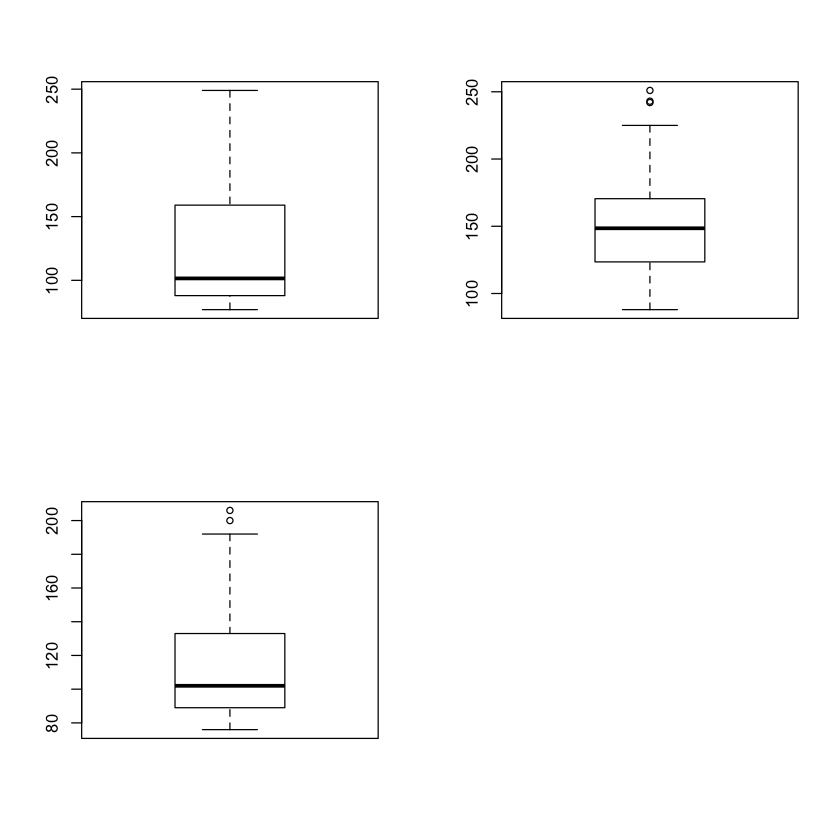

In [41]:
par(mfrow = c(2,2))
boxplot(sd일차0$소요시간)
boxplot(sd일차1$소요시간)
boxplot(sd일차2$소요시간)

In [160]:
# 

sdd2 <- read.csv("../Data_Project/AI프로젝트 - D-2-2.csv")
sdd1 <- read.csv("../Data_Project/AI프로젝트 - D-1.csv")

table(sdd2$소요시간범위)
table(sdd1$소요시간범위)

sdd2Scale <- sdd2[,6:8]

sdd2Scale <- scale(sdd2Scale)
head(sdd2Scale)

sdd2 <- sdd2[,-c(4,9)]
sdd1 <- sdd1[,-c(4,9)]
head(sdd2)
head(sdd1)
sdd2Scale <- cbind(sdd2[,1:4], sdd2Scale)
head(sdd2Scale)
head(sdd1[,c(1:6)])


 A  B  C  D 
35 37 36 36 


 A  B  C  D 
37 38 31 38 

X1종.교통량,X2종.교통량,서울인구수
-0.8192102,-0.86871839,1.124724
-0.9097371,-0.91451260,1.124724
-0.9570474,-0.85878925,1.124724
-0.9722092,-0.73574812,1.124724
-0.9286934,-0.49543791,1.124724
-0.7205572,0.07749504,1.124724


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
B,0,3,TRUE,3793419,229419,10388055
B,1,3,TRUE,2514790,203047,10388055
B,2,3,TRUE,1846564,235137,10388055
A,3,3,TRUE,1632415,305994,10388055
B,4,3,TRUE,2247045,444384,10388055
B,5,3,TRUE,5186824,774325,10388055


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
B,0,3,TRUE,3793419,229419,10388055
B,1,3,TRUE,2514790,203047,10388055
A,2,3,TRUE,1846564,235137,10388055
A,3,3,TRUE,1632415,305994,10388055
A,4,3,TRUE,2247045,444384,10388055
A,5,3,TRUE,5186824,774325,10388055


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
B,0,3,TRUE,-0.8192102,-0.86871839,1.124724
B,1,3,TRUE,-0.9097371,-0.91451260,1.124724
B,2,3,TRUE,-0.9570474,-0.85878925,1.124724
A,3,3,TRUE,-0.9722092,-0.73574812,1.124724
B,4,3,TRUE,-0.9286934,-0.49543791,1.124724
B,5,3,TRUE,-0.7205572,0.07749504,1.124724


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량
B,0,3,TRUE,3793419,229419
B,1,3,TRUE,2514790,203047
A,2,3,TRUE,1846564,235137
A,3,3,TRUE,1632415,305994
A,4,3,TRUE,2247045,444384
A,5,3,TRUE,5186824,774325


In [169]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

for (i in 1:5){
  samp <- createDataPartition(sdd1[,c(1:6)]$소요시간범위, p=0.7, list=F)
  data.tr <- sdd1[,c(1:6)][samp,]
  data.test <- sdd1[,c(1:6)][-samp,]
    
  # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간범위)
  y_tr <- data.tr$소요시간범위
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간범위)
  y_test <- data.test$소요시간범위
    
  # RF
  model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean(pred_rf == y_test)
  # RF train
  model_rf_tr <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean(pred_rf_tr == y_tr)

  
  # 인공신경망
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet <- predict(model_nnet, x_test, type="class")
  예측력_nnet <- mean(pred_nnet == y_test)
  # 인공신경망 train
  model_nnet_tr <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
  예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean(pred_ctree == y_test)
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean(pred_ctree_tr == y_tr)
    
  # SVM test
  model_svm <- svm(소요시간범위 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean(pred_svm == y_test)
  # SVM train
   model_svm_tr <- svm(소요시간범위 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean(pred_svm_tr == y_tr)
    
  # 다항 로지스틱 회귀분석
   model_multinom <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
   pred_multinom <- predict(model_multinom, x_test, type="class")
   예측력_multinom <- mean(pred_multinom == y_test)
  # 다항 로지스틱 회귀분석 train
    model_multinom_tr <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
    pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
    예측력_multinom_tr <- mean(pred_multinom_tr == y_tr)
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  sum_multi <- sum_multi + 예측력_multinom
  sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
  sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
  sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", (round(sum_rf,2)/5), "\n")
cat("의사결정나무 : ", (round(sum_ctree,2)/5), "\n")
cat("SVM :  ", (round(sum_svm,2)/5), "\n")
cat("다항 로지스틱 :  ", (round(sum_multi,2)/5), "\n")
cat("인공신경망 :  ", (round(sum_nnet,2)/5), "\n")
# sum_ctree
cat("------------------------", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", (round(sum_rf_tr,2)/5), "\n")
cat("의사결정나무 : ", (round(sum_ctree_tr,2)/5), "\n")
cat("SVM :  ", (round(sum_svm_tr,2)/5), "\n")
cat("다항 로지스틱 :  ", (round(sum_multi_tr,2)/5), "\n")
cat("인공신경망 :  ", (round(sum_nnet_tr,2)/5), "\n")

Test Data 
랜덤 포레스트 :  0.596 
의사결정나무 :  0.528 
SVM :   0.624 
다항 로지스틱 :   0.62 
인공신경망 :   0.528 
------------------------ 
Training Data 
랜덤 포레스트 :  1 
의사결정나무 :  0.598 
SVM :   0.656 
다항 로지스틱 :   0.636 
인공신경망 :   0.252 


In [154]:
popCar <- read.csv("../Data_Project/인구수자동차수.csv")

In [74]:
popCar

X,년도,서울인구수,승용차,승합차,차합계
1,2013,10388055,2462515,156871,2619386
6,2014,10369593,2510742,149991,2660733
11,2015,10297138,2560154,141927,2702081
16,2016,10204057,2598344,134309,2732653
21,2017,10124579,2641190,127564,2768754
26,2018,10049607,2658637,120780,2779417
31,2019,10010983,2670803,114310,2785113
37,2020,9911088,2711984,106504,2818488


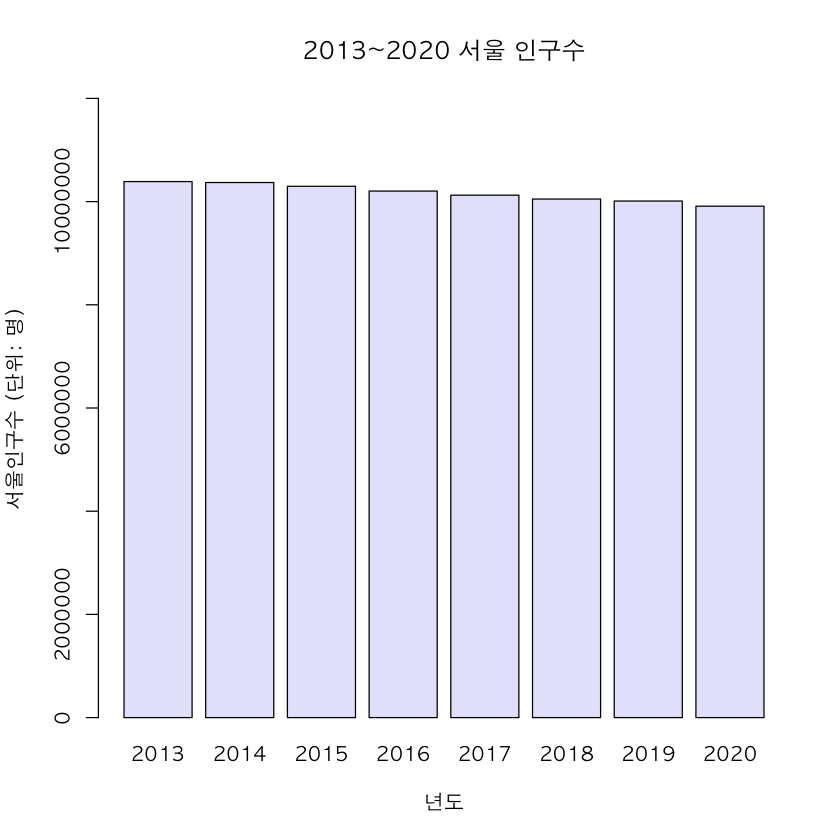

In [117]:
par(family = "AppleGothic")
options(scipen = 100)

barplot(
    popCar$서울인구수,
    type = 'o',
    main = '2013~2020 서울 인구수',
    ylim = c(0, 12000000),
    ylab = c('서울인구수 (단위: 명)'),
    xlab = c('년도'),
    names = popCar$년도,
    col= 'lavender',
    
)

소요시간범위,출발시간,연휴길이,날짜,눈비,X1종.교통량,X2종.교통량,서울인구수,소요시간
B,0,3,2013-02-09,TRUE,3793419,229419,10388055,132
B,1,3,2013-02-09,TRUE,2514790,203047,10388055,129
A,2,3,2013-02-09,TRUE,1846564,235137,10388055,121
A,3,3,2013-02-09,TRUE,1632415,305994,10388055,124
A,4,3,2013-02-09,TRUE,2247045,444384,10388055,119
A,5,3,2013-02-09,TRUE,5186824,774325,10388055,118
